# Breast Cancer Prediction Project

Breast cancer is one of the most common cancers in women globally, accounting for the majority of new cancer cases and 
cancer-related deaths according to global statistics, making it a major public health problem in the world.

Early diagnosis of breast cancer can dramatically improve prognosis and chances of survival, as it can promote timely clinical treatment of patients.more precise classification of benign tumours can prevent patients from undergoing unnecessary treatments.

So, In this project we are going to make prediction to breast cancer using Wincosin Breast Cancer Dataset

## Import Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.simplefilter('ignore')
import pickle

## Loading the dataset

In [2]:
# Load the breast cancer dataset 
data = pd.read_csv('breast-cancer-wisconsin.csv')

In [3]:
#Description of the dataset featuers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#Getting the size of the dataset
data.shape

(569, 33)

In [5]:
#Get the first 5 rows of the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We can see that Unnamed:32 and id are of no use, and may interfere with our model in an improper manner, so we can drop these columns from our dataframe.

In [6]:
#Remove irrelevant features
data =data.drop(['id','Unnamed: 32'], axis=1)

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
print('counts of Malignant and Benign\n',data['diagnosis'].value_counts())

counts of Malignant and Benign
 B    357
M    212
Name: diagnosis, dtype: int64


<Axes: xlabel='diagnosis', ylabel='count'>

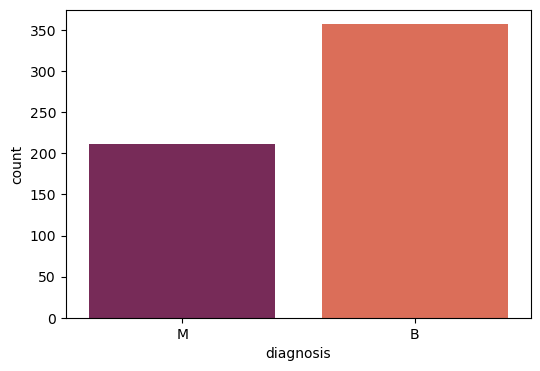

In [9]:
#Plot each class freequency
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis',data=data,palette='rocket')

In [10]:
##Data preprocessing

In [11]:
##Checking Null values in the dataset

In [12]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
#Class Imblance Checking
# Validate each class to understand if the dataset is imbalanced.

print ('Total Belign Tumor (B)    :  {} and its percentage is {} %'.format(data['diagnosis'].value_counts()[0],
round(data['diagnosis'].value_counts()[0]/data['diagnosis'].value_counts().sum()*100,2)) )

print ('Total Malignant Tumor (M) :  {} and its percentage is {} %'.format(data['diagnosis'].value_counts()[1],
round(data['diagnosis'].value_counts()[1]/data['diagnosis'].value_counts().sum()*100,2)))

Total Belign Tumor (B)    :  357 and its percentage is 62.74 %
Total Malignant Tumor (M) :  212 and its percentage is 37.26 %


Dataset is not imbalanced, we are good to go.

In [14]:
# Separate the features (X) and the target variable (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

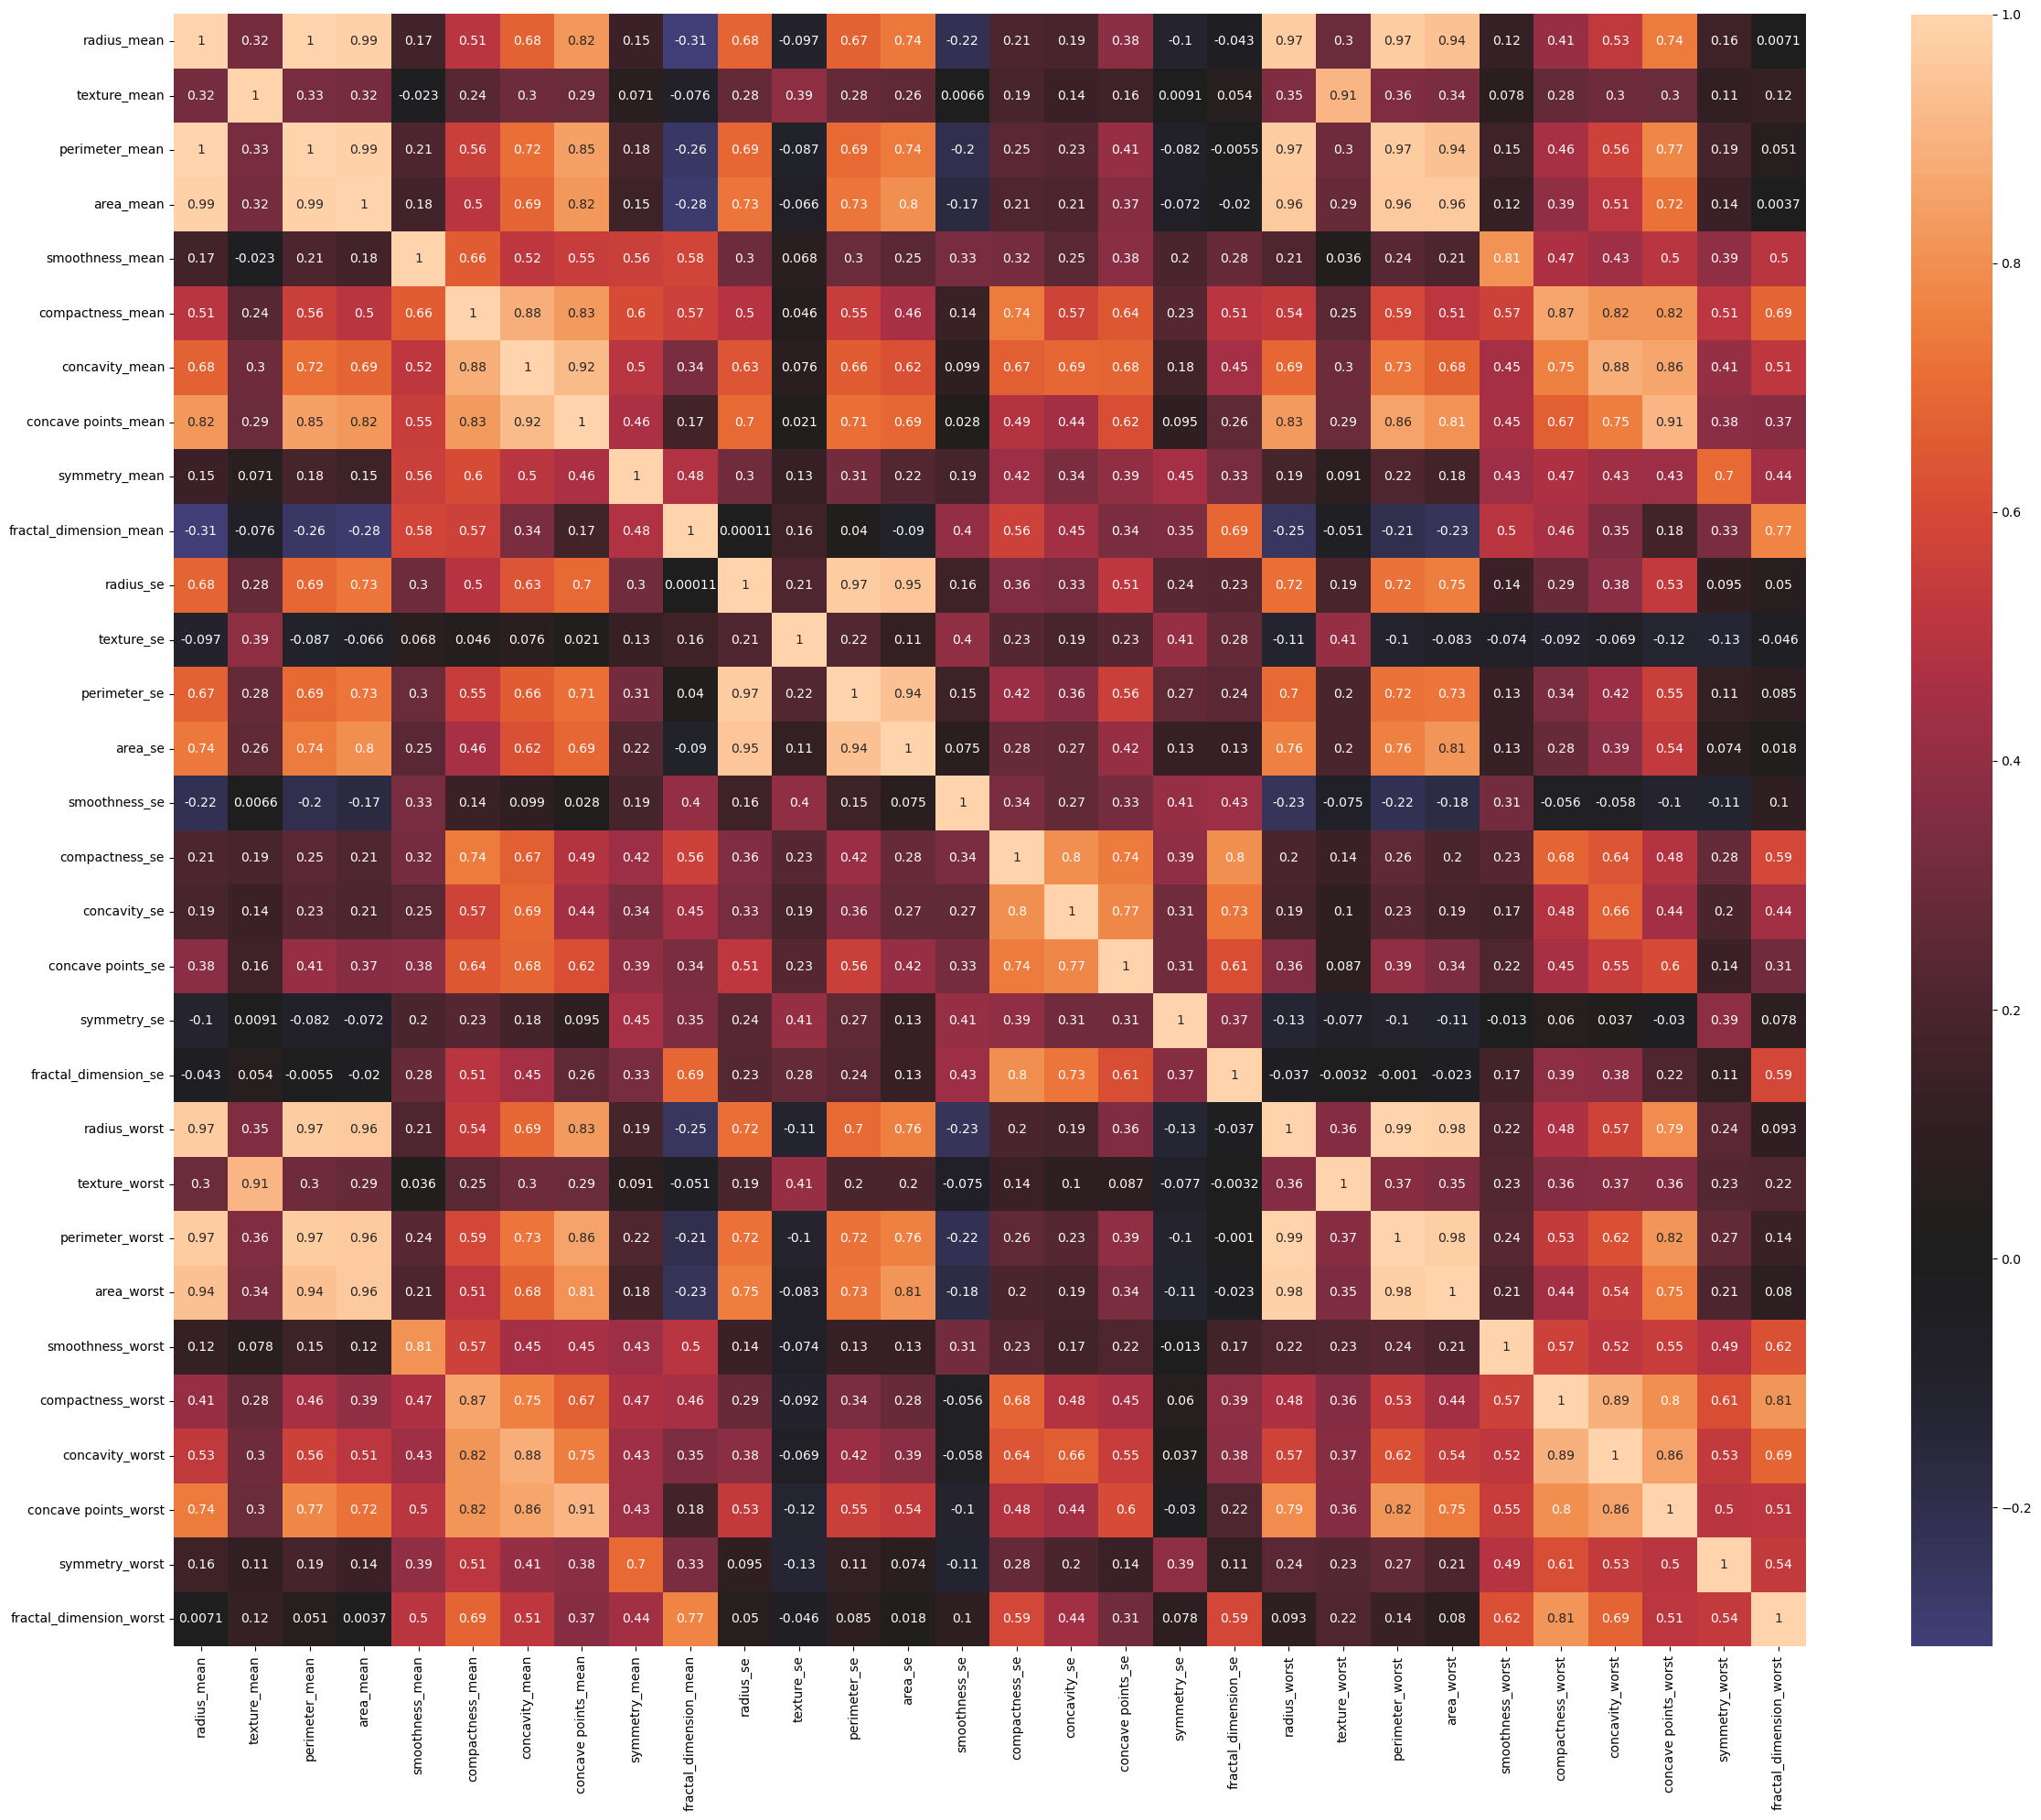

In [15]:
# Visualize the correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(X.corr(), annot=True,
            square=True, center=0)
plt.tight_layout()

In [16]:
# Data Standarization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Perform label encoding for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [18]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [19]:
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 8 features
X_selected = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [20]:
# Convert X_selected back to a DataFrame with selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

#Now the dimensionality of our dataset has been reduced to 10 features
X_selected_df.shape

(569, 10)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 10), (171, 10), (398,), (171,))

In [23]:
# Define the SVM classifier
svm = SVC(kernel='rbf')

In [24]:
# Define the parameter grid for Grid Search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.01, 0.001, 0.0001]}

In [25]:
# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [26]:
GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy')

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [27]:
# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [28]:
# Train the model using the best parameters
best_estimator.fit(X_train, y_train)

SVC(C=1, gamma=0.0001)

In [29]:
# Perform cross-validation
cv_scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='accuracy')

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

model = best_estimator

In [30]:
accuracy = accuracy_score(y_test,y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



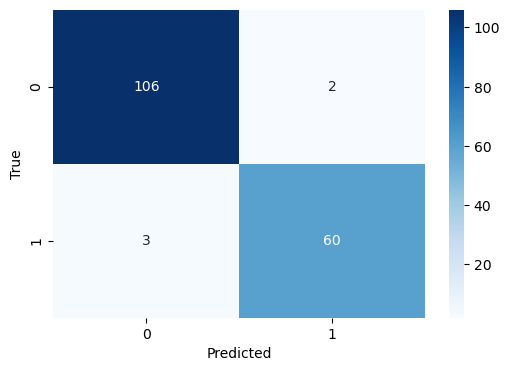

In [31]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Display the plots
plt.show()

In [32]:
# Print the best parameters and the accuracy scores
print("Best Parameters:", best_params)
print("Model Accuracy:", round(accuracy,2)*100,"%")

Best Parameters: {'C': 1, 'gamma': 0.0001}
Model Accuracy: 97.0 %


In [33]:
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [34]:
# Building a predictive system

input_data = (17.99,122.8,1001,0.3001,0.1471,25.38,184.6,2019, 0.7119,0.2654)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are prediction for one data point

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
    print("The Breast cancer is Malignant")
    
else:
    print("The Breast Cancer is Benign")

[1]
The Breast Cancer is Benign


In [35]:
input_data = (13.08,87.46,566.3, 0.06664,0.04781, 15.11, 99.7, 711.2,0.239, 0.1288)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are prediction for one data point

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
    print("The Breast cancer is Malignant")
    
else:
    print("The Breast Cancer is Benign")

[0]
The Breast cancer is Malignant


In [36]:
##Big Thanks to Mr. O.S Dada for his support and encouragement

In [37]:
pickle.dump(model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))